In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
X=iris.data
Y=iris.target

鳶尾花的資料分為萼片長度(sepal length)以及萼片寬度(sepal width)、花瓣長度(petal length)、花瓣寬度(petal width)

In [9]:
X[0]  #分別表示第一個的萼片長度(sepal length)以及萼片寬度(sepal width)、花瓣長度(petal length)、花瓣寬度(petal width)

array([5.1, 3.5, 1.4, 0.2])

In [10]:
#要讀第一個的花瓣長度(petal length)、花瓣寬度(petal width)
X[0][2:]
#[2:]表示第2個到最後一個

array([1.4, 0.2])

In [11]:
X = X[:, 2:]
#表示我們只要全部的花瓣長度跟寬度

In [12]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=87)

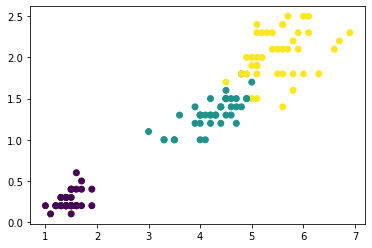

In [19]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)

In [20]:
from sklearn.svm import SVC

In [21]:
clf = SVC()

In [22]:
clf.fit(x_train, y_train)

SVC()

In [23]:
y_predict = clf.predict(x_test)

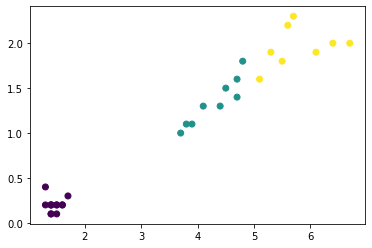

In [24]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict)

看起來學得跟我們之前的結果很像

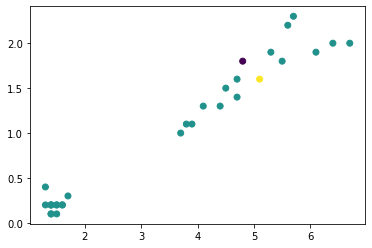

In [27]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict- y_test)

有分對的話，y_predict - y_test的結果就會是0，則全部點都會是同個顏色，現在看到的圖有兩個點不同色，表示這兩個沒有分對

要用y_test去減不能用y_train，因為裡面的數字個數不一樣

In [30]:
np.arange(1,10,0.2)

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
       3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. , 5.2, 5.4, 5.6, 5.8, 6. ,
       6.2, 6.4, 6.6, 6.8, 7. , 7.2, 7.4, 7.6, 7.8, 8. , 8.2, 8.4, 8.6,
       8.8, 9. , 9.2, 9.4, 9.6, 9.8])

In [33]:
x1,x2= np.meshgrid(np.arange(0,7,0.02), np.arange(0,3,0.02))

In [34]:
xx=[1,2,3,4]
yy=[5,6,7,8]
#和zip很像的numpy指令，np.c_[xx,yy]
np.c_[xx,yy]

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [36]:
Z= clf.predict(np.c_[x1.ravel(),x2.ravel()])
#假設預測出的資料是Z，我們剛剛用meshgrid做出x1, x2的資料，還要都用ravel拉平，才能分別表示x座標和y座標

In [37]:
Z=Z.reshape(x1.shape)
#打算把Z也改成x1的形狀

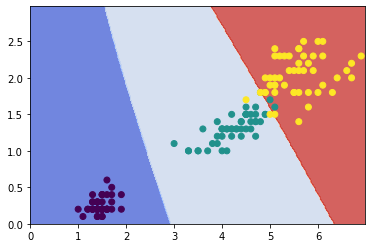

In [39]:
plt.contourf(x1,x2,Z, cmap=plt.cm.coolwarm, alpha=0.8)
#cmap是設定顏色的colormap，要自己去找，alpha是不透明度
plt.scatter(X[:,0],X[:,1],c=Y)